# **Latar Belakang**

Dalam era perdagangan online, pengiriman barang menjadi faktor penting dalam perkembangan industri tersebut. Perusahaan ekspedisi pengiriman bersaing untuk menjadi yang tercepat dan terjangkau dengan memperhatikan kepuasan konsumen sebagai parameter keberhasilan. Oleh karena itu, perusahaan ingin mengevaluasi rating yang diberikan oleh konsumen setiap kali melakukan pembelian untuk mengukur tingkat kepuasan konsumen. Perusahaan perlu melakukan analisis mendalam mengenai faktor-faktor yang menyebabkan penilaian buruk dan penanganannya, mengevaluasi dan meningkatkan proses pengiriman mereka, mengoptimalkan strategi penerimaan, pemindahan, penyimpanan, pengambilan, pengemasan, dan pengiriman barang di gudang pusat dan pemanfaatan merata gudang lainya, memberikan layanan barang tepat waktu pada beragam diskon, dan memperbaiki SDM Customer Care.

# **Pernyataan Masalah**

Dalam era perdagangan online yang terus berkembang, pengiriman barang menjadi faktor penting dalam kesuksesan perusahaan. Untuk meningkatkan kepuasan konsumen, perusahaan perlu menganalisis data yang ada untuk mengetahui rating yang diberikan oleh konsumen dan mengidentifikasi tren atau pola dalam layanan perusahaan yang dapat diperbaiki. Sebagai seorang analis data, tugas saya sebagai *Data Sciene* adalah membantu perusahaan mengidentifikasi tren dan pola dalam data mereka untuk memperbaiki layanan. Hasil analisis ini akan menjadi pertimbangan bagi Senior Manager Logistik.

In [2]:
# importing python library
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import lines, patches, rcParams

from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline

In [5]:
# load the data
df = pd.read_csv(r'E:\JCDS-Purwadhika\CapstoneModule2\data\processed\cleaned_data.csv', engine='pyarrow')
print(f'Total rows {df.shape[0]}, Total Colum {df.shape[1]}')
display (df.head(), df.tail())

Total rows 10999, Total Colum 16


,Warehouse,Shipment,Calls,Category_Calls,Rating,Satisfactions,Cost,Purchase,Category_Purchase,Importance,Gender,Discount,Category_Discount,Weight,Category_Weight,Late
0,D,Flight,4,2 - 4 (Rendah),2,neutral or dissatisfied,177,3,Seldom,low,F,44,> 7 (High),1233,0 - 1332 (Small),1
1,F,Flight,4,2 - 4 (Rendah),5,satisfied,216,2,Seldom,low,M,59,> 7 (High),3088,1333 - 4149 (Medium),1
2,A,Flight,2,2 - 4 (Rendah),2,neutral or dissatisfied,183,4,Often,low,M,48,> 7 (High),3374,1333 - 4149 (Medium),1
3,B,Flight,3,2 - 4 (Rendah),3,neutral or dissatisfied,176,4,Often,medium,M,10,> 7 (High),1177,0 - 1332 (Small),1
4,C,Flight,2,2 - 4 (Rendah),2,neutral or dissatisfied,184,3,Seldom,medium,F,46,> 7 (High),2484,1333 - 4149 (Medium),1


,Warehouse,Shipment,Calls,Category_Calls,Rating,Satisfactions,Cost,Purchase,Category_Purchase,Importance,Gender,Discount,Category_Discount,Weight,Category_Weight,Late
10994,A,Ship,4,2 - 4 (Rendah),1,neutral or dissatisfied,252,5,Often,medium,F,1,0 - 3 (Low),1538,1333 - 4149 (Medium),1
10995,B,Ship,4,2 - 4 (Rendah),1,neutral or dissatisfied,232,5,Often,medium,F,6,4 - 7 (Medium),1247,0 - 1332 (Small),0
10996,C,Ship,5,> 4 (Tinggi),4,satisfied,242,5,Often,low,F,4,4 - 7 (Medium),1155,0 - 1332 (Small),0
10997,F,Ship,5,> 4 (Tinggi),2,neutral or dissatisfied,223,6,Often,medium,M,2,0 - 3 (Low),1210,0 - 1332 (Small),0
10998,D,Ship,2,2 - 4 (Rendah),5,satisfied,155,5,Often,low,F,6,4 - 7 (Medium),1639,1333 - 4149 (Medium),0


In [188]:
# Cek data type, null value, unique value untuk setiap variable
print(f'Total rows {df.shape[0]}, Total Colum {df.shape[1]}')
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

Total rows 10999, Total Colum 16


,feature,data_type,null_value,n_unique,sample_unique
0,Warehouse,object,0.0,5,"[D, F, A, B, C]"
1,Shipment,object,0.0,3,"[Flight, Ship, Road]"
2,Calls,int64,0.0,6,"[4, 2, 3, 5, 6, 7]"
3,Category_Calls,object,0.0,2,"[2 - 4 (Rendah), > 4 (Tinggi)]"
4,Rating,int64,0.0,5,"[2, 5, 3, 1, 4]"
5,Satisfactions,object,0.0,2,"[neutral or dissatisfied, satisfied]"
6,Cost,int64,0.0,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, ..."
7,Purchase,int64,0.0,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
8,Category_Purchase,object,0.0,2,"[Seldom, Often]"
9,Importance,object,0.0,3,"[low, medium, high]"


In [215]:
display(df.describe(), df.describe(include='object'))

,Calls,Rating,Cost,Purchase,Discount,Weight,Late
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


,Warehouse,Shipment,Category_Calls,Satisfactions,Category_Purchase,Importance,Gender,Category_Discount,Category_Weight
count,10999,10999,10999,10999,10999,10999,10999,10999,10999
unique,5,3,2,2,2,3,2,3,3
top,F,Ship,2 - 4 (Rendah),neutral or dissatisfied,Seldom,low,F,> 7 (High),> 4149 (Large)
freq,3666,7462,7412,6639,6554,5297,5545,5153,5498


## **Data Analysis**
Setelah sudah dilakukan proses *data cleaning*, langkah selanjutnya adalah melakukan analisis untuk mengetahui apakah konsumen online retail shipping merasa puas dengan pelayanan yang diberikan dan faktor-faktor apa yang mempengaruhinya. Tujuan dari analisis ini adalah untuk memberikan rekomendasi guna meningkatkan kualitas pelayanan.

### Kepuasan Konsumen
Kepuasan Konsumen menjadi ukuran yang menentukan seberapa baik pelayanan memenuhi harapan Konsumen. Dengan mendapatkan *feedback* dari Konsumen, dapat membantu meningkatkan pelayanan dan memprediksi perkembangan bisnis. 


Dari dataset, hasil kepuasan diklasifikasikan menjadi 'puas' dan 'netral atau tidak puas'. Hal tersebut membatasi pendekatan maskapai untuk menganalisa apabila penumpang netral atau tidak puas. Berikut perbandingan kepuasan penumpang.

In [216]:
df['Satisfactions'].value_counts()

Satisfactions
neutral or dissatisfied    6639
satisfied                  4360
Name: count, dtype: int64

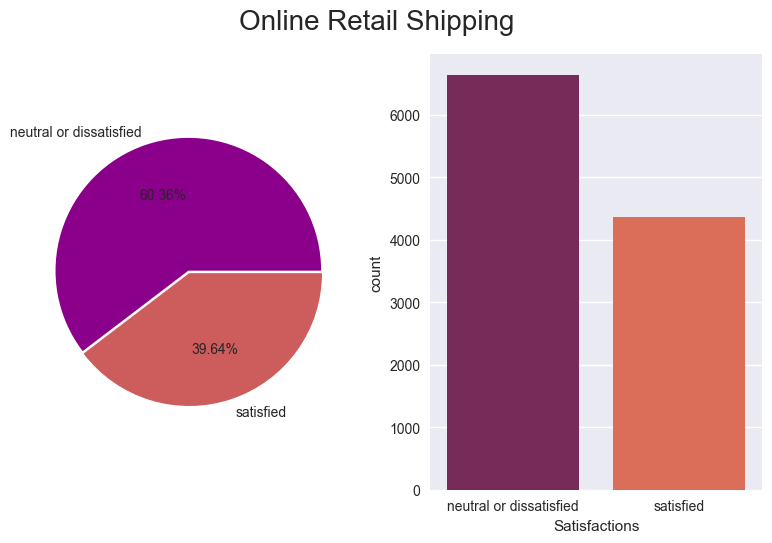

In [44]:
# Perbandingan penumpang 'puas' dan 'netral atau tidak puas'
# plt.style.use('seaborn')
plt.figure().suptitle('Online Retail Shipping', fontsize=20)
plt.subplot(1,2,1)
plt.pie(df['Satisfactions'].value_counts(), labels=['neutral or dissatisfied', 'satisfied'],autopct='%.2f%%',explode=(0.01,0.01), colors= ['DarkMagenta','IndianRed'])
plt.subplot(1,2,2)
sns.countplot(data=df, x='Satisfactions', palette='rocket')
plt.tight_layout()
plt.show()  

Dari grafik diatas dapat dilihat bahwa lebih banyak konsumen yang netral atau tidak puas dengan pelayanan yang diberikan Online Retail Shipping sampai saat ini, sebanyak **`60,36%`**. 

Analisa kepuasan konsumen dilakukan dengan cara melakukan segmentasi konsumen sesuai klasifikasi konsumen, setelah itu akan dilihat perbandingan nilai rating yang diberikan dan kepuasan sesuai dengan segmentasi untuk mengetahui area mana yang harus di*improve*, serta akan dilakukan analisa apabila ada hubungan diantara aspek-aspek yang dianalisa. 

In [218]:
# Fungsi Tabel Kategori terhadap Kepuasan Konsumen
def TabelProporsiKepuasan(Data,Satisfactions,df):
    # Membuat crosstab
    Jumlah = pd.crosstab(df[Data],df[Satisfactions])
    Proporsi=pd.crosstab(df[Data],df[Satisfactions],normalize='index').round(4)*100
    # Menggabungkan Tabel
    TabelKepuasan = pd.merge(Jumlah, Proporsi,on=Data)
    TabelKepuasan.insert(2,'Total',(pd.crosstab(df[Data],df[Satisfactions]).sort_index().sum(axis=1)))
    TabelKepuasan.rename(columns={'neutral or dissatisfied_x':'Neutral_Dissatisfied_Val','satisfied_x':'Satisfied_Val', 'neutral or dissatisfied_y':'Neutral_Dissatisfied_%','satisfied_y':'Satisfied_%'},inplace=True)
    return TabelKepuasan
    
RatingCol = df.select_dtypes(include =['int64','float64']).columns
def Rating(category,data):
    fig, axs = plt.subplots(7, 2, figsize=(15, 15))
    fig.tight_layout(pad=3.0)
    for feature,ax in zip(RatingCol,axs.ravel()):
        ax = pd.crosstab(data[feature],data[category]).plot(ax=ax,kind='bar', stacked=True)
        



Berikutnya akan dilakukan pengamatan berdasarkan klasifikasi konsumen, dimana akan dianalisa pengaruh Gender, Calls (Panggilan), Diskon yang diberikan, dan sebagainya terhadap tingkat kepuasan konsumen. Pada analisa ini beberapa data akan diukur menggunakan crosstabulation untuk mengetahui proporsi dan pengaruh kategori terhadap kepuasan konsumen, dan beberapa data yang digunakan adalah metode chi squared contingency untuk uji hipotesis hubungan.

##### **Gender vs Satisfactions**
`Pertanyaan:`
Bagaimana Satisfactions konsumen terhadap perusahaan?

Data gender berisi *male*(laki-laki) dan *female*(perempuan). Untuk mengetahui value dan proporsi, digunakan fungsi tabel proporsi kepuasan. 

In [193]:
TabelProporsiKepuasan('Gender','Satisfactions',df)

Satisfactions,Neutral_Dissatisfied_Val,Satisfied_Val,Total,Neutral_Dissatisfied_%,Satisfied_%
Gender,,,,,
F,3354,2191,5545,60.49,39.51
M,3285,2169,5454,60.23,39.77


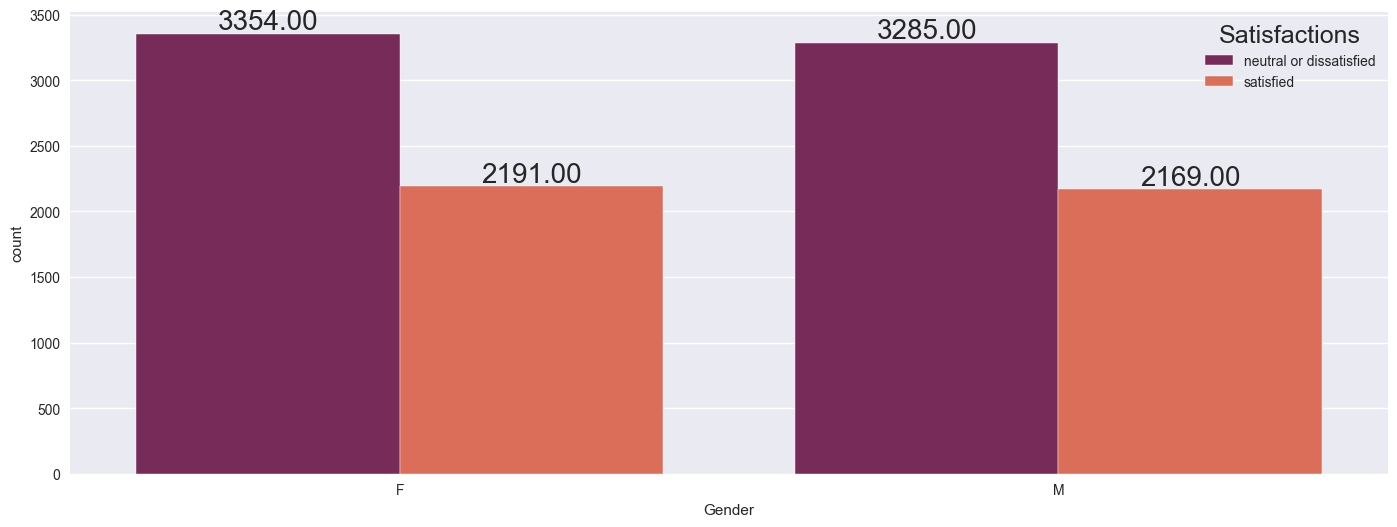

In [194]:
# making a countplot of gender column and see the effect of Satisfactions column.

plt.figure(figsize=(17, 6))
chart =sns.countplot(x='Gender', hue='Satisfactions', data=df, palette='rocket')

# Adding annotation
for bar in chart.patches:
    chart.annotate(
        format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height() + 2), 
        ha='center', 
        va='center',
        size=20, 
        xytext=(0, 8),
        textcoords='offset points')

plt.show()


In [219]:
# Menguji hipotesis apabila gender mempengaruhi kepuasan penumpang dengan chi squared contingency
df_ct = pd.crosstab(df['Gender'],df['Satisfactions'])
# Performing the chi-square test
chi2, p_value, dof, expected = chi2_contingency(df_ct)

# Printing the test statistics and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

# Defining significance level (alpha)
alpha = 0.05

# Conducting hypothesis test
if p_value > alpha:
    print("Accept H0: Tidak ada perbedaan signifikan dalam jenis kelamin terhadap kepuasan konsumen.")
else:
    print("Reject H0: Terdapat perbedaan signifikan dalam jenis kelamin terhadap kepuasan konsumen.")


Chi-square statistic: 0.06493852955127842
p-value: 0.7988540992753148
Degrees of freedom: 1
Accept H0: Tidak ada perbedaan signifikan dalam jenis kelamin terhadap kepuasan konsumen.


Dari uji statistik diatas, dapat diketahui bahwa meskipun proporsi laki-laki dan perempuan hampir sama, tetapi hasil uji statistik adalah Tidak ada perbedaan signifikan dalam gender terhadap kepuasan pelanggan.

**Insight:**

Dari hasil visualisasi yang ditampilkan menunjukkan bahwa Satisfactions konsumen kepada perusahaan cenderung `Neutral or Dissatisfied` dengan nilai yang tinggi yaitu **`60,36%`**. Untuk meningkatkan kepuasan konsumen, perusahaan dapat memperhatikan faktor-faktor yang dapat mempengaruhi rating yang lebih baik. Hal ini dapat dilakukan dengan melakukan analisis lebih lanjut terhadap beberapa faktor dan melakukan perbaikan pada aspek-aspek yang perlu ditingkatkan agar konsumen memberikan rating yang lebih baik. Beberapa hal yang mempengaruhi konsumen dalam memberikan rating antara lain waktu pengiriman, panggilan konsumen servis, dan diskon yang ditawarkan.

##### **Discount vs Satisfaction**
`Pertanyaan:`
Apakah diskon mempengaruhi Satisfactions konsumen terhadap perusahaan?

Dari hasil survei, akan dilihat distribusi diskon dikategorikan sesuai dengan kepuasan konsumen. 

In [196]:
# Membuat proporsi kepuasan penumpang berdasarkan diskon  categori
TabelProporsiKepuasan('Category_Discount','Satisfactions',df)

Satisfactions,Neutral_Dissatisfied_Val,Satisfied_Val,Total,Neutral_Dissatisfied_%,Satisfied_%
Category_Discount,,,,,
0 - 3 (Low),1538,984,2522,60.98,39.02
4 - 7 (Medium),1998,1326,3324,60.11,39.89
> 7 (High),3103,2050,5153,60.22,39.78


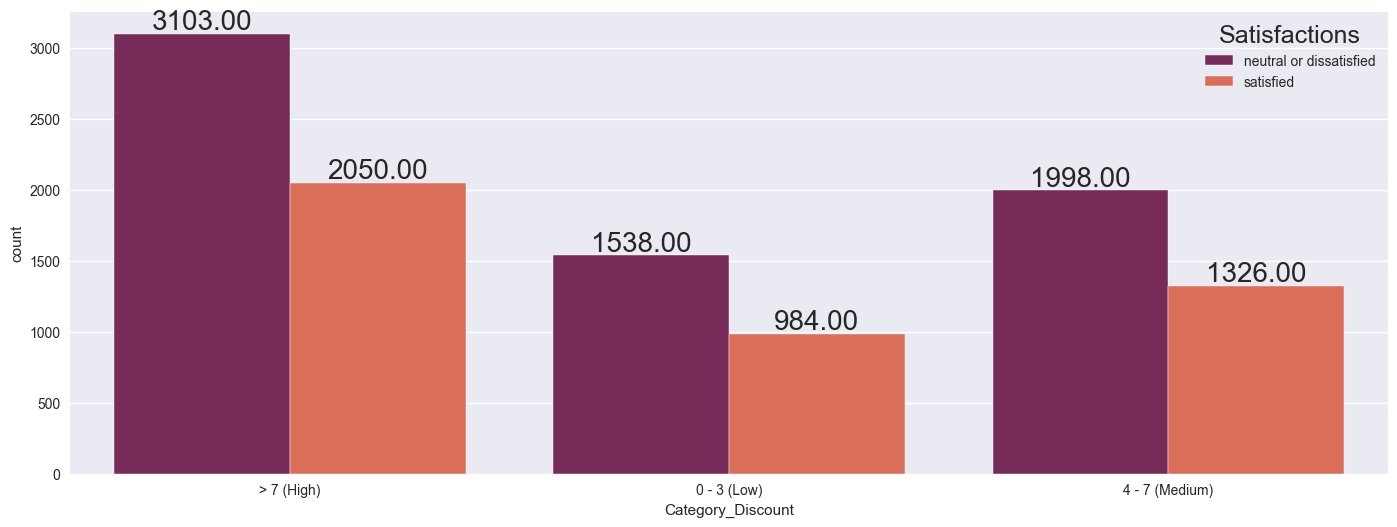

In [197]:
# making a countplot of discount column and see the effect of Satisfactions column.

plt.figure(figsize=(17, 6))
chart = sns.countplot(x='Category_Discount', hue='Satisfactions', data=df, palette='rocket')
# Adding annotation
for bar in chart.patches:
    chart.annotate(
        format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height() + 2), 
        ha='center', 
        va='center',
        size=20, 
        xytext=(0, 8),
        textcoords='offset points')

plt.show()


In [220]:
# Menguji hipotesis apabila diskon mempengaruhi kepuasan penumpang dengan chi squared contingency
df_ct = pd.crosstab(df['Category_Discount'],df['Satisfactions'])
# Performing the chi-square test
chi2, p_value, dof, expected = chi2_contingency(df_ct)

# Printing the test statistics and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

# Defining significance level (alpha)
alpha = 0.05

# Conducting hypothesis test
if p_value >= alpha:
    print("Accept H0: Tidak ada perbedaan signifikan dalam kategori diskon terhadap kepuasan pelanggan.")
else:
    print("Reject H0: Terdapat perbedaan signifikan dalam tipe kategori diskon terhadap kepuasan pelanggan.")

Chi-square statistic: 0.5413994259303601
p-value: 0.7628455346383607
Degrees of freedom: 2
Accept H0: Tidak ada perbedaan signifikan dalam kategori diskon terhadap kepuasan pelanggan.


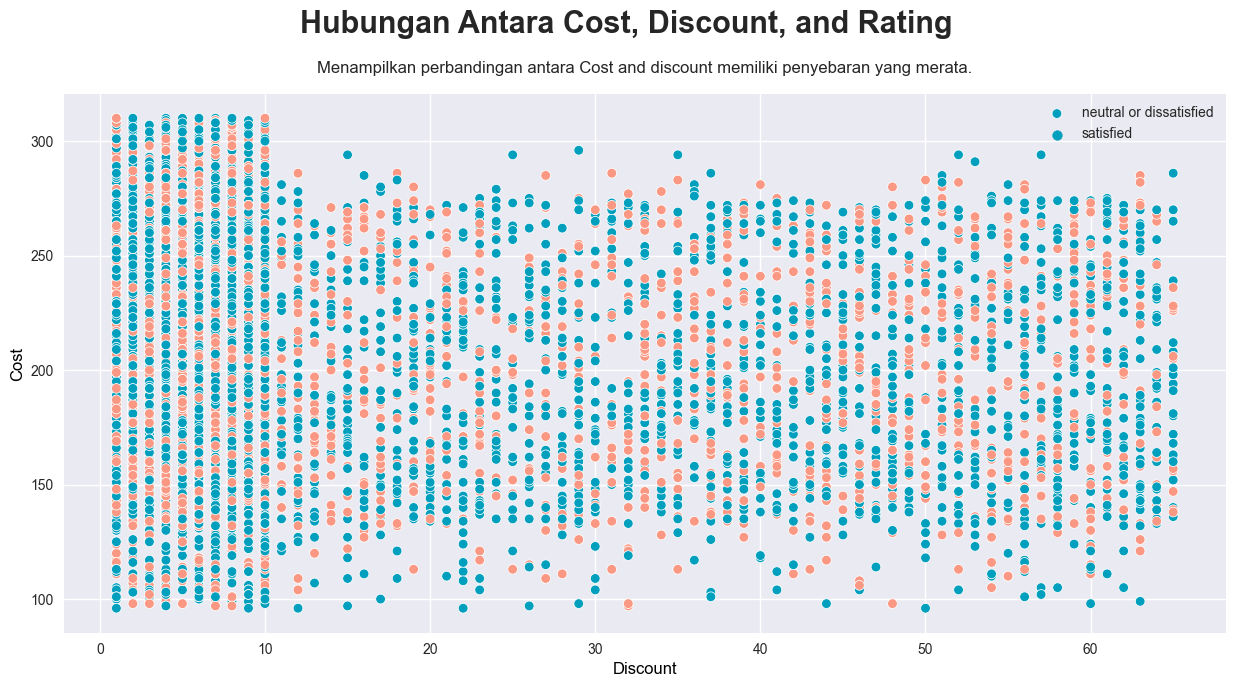

In [221]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Discount', y='Cost', data=df, hue='Satisfactions', palette=['#009FBD', '#FA9884'])
plt.suptitle('Hubungan Antara Cost, Discount, and Rating', fontsize=22, fontweight='bold', y=1)
plt.title('Menampilkan perbandingan antara Cost and discount memiliki penyebaran yang merata.', pad=15)
plt.xlabel('Discount', font={'family': 'sans-serif', 'size': 12}, color='black')
plt.ylabel('Cost', font={'family': 'sans-serif', 'size': 12}, color='black')

plt.legend(labels=['neutral or dissatisfied', 'satisfied'])

plt.show()

**Insight:**
- Visualisasi scatterplot hubungan antara `Discount, Cost, dan Rating`. Hubungn Harga produk dengan diskon yang ditawarkan tersebar merata tidak ada kecenderungan tertentu. Produk dengan diskon lebih besar (**>7(High)**) memiliki **`neutral or dissatisfied`** sebanyak **3103**. Hal ini perlunya anlisis lebih lanjut apakah hal ini dipengaruhi oleh waktu pengiriman. Karena, walaupun produk memiliki diskon yang tinggi akan tetapi konsumen tidak merasa puas.

##### **Late vs Satisfaction**
a. Bagaimana persentase keterlambatan pengiriman di perusahaan?

Data Late berisi *1*(Delayed) dan *0*(Ontime). Untuk mengetahui value dan proporsi, digunakan fungsi tabel proporsi kepuasan. 

In [200]:
TabelProporsiKepuasan('Late','Satisfactions',df)

Satisfactions,Neutral_Dissatisfied_Val,Satisfied_Val,Total,Neutral_Dissatisfied_%,Satisfied_%
Late,,,,,
0,2696,1740,4436,60.78,39.22
1,3943,2620,6563,60.08,39.92


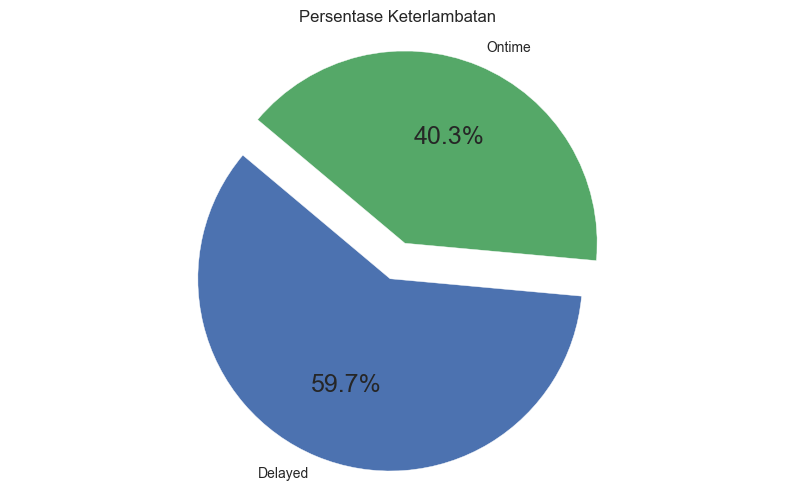

In [222]:
pop_time = df['Late'].sum()
labels = ['Delayed', 'Ontime']
explode = [0.1] * len(labels)

# Plot
plt.figure(figsize=(10,6))
plt.pie([pop_time, len(df) - pop_time], labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Persentase Keterlambatan")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [223]:
# Menguji hipotesis apabila waktu pengiriman mempengaruhi kepuasan penumpang dengan chi squared contingency
df_ct = pd.crosstab(df['Late'],df['Satisfactions'])
# Performing the chi-square test
chi2, p_value, dof, expected = chi2_contingency(df_ct)

# Printing the test statistics and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

# Defining significance level (alpha)
alpha = 0.05

# Conducting hypothesis test
if p_value >= alpha:
    print("Accept H0: Tidak ada perbedaan signifikan dalam Waktu Pengiriman terhadap kepuasan konsumen.")
else:
    print("Reject H0: Terdapat perbedaan signifikan dalam waktu pengiriman terhadap kepuasan konsumen.")


Chi-square statistic: 0.5075585241664634
p-value: 0.47619766655433093
Degrees of freedom: 1
Accept H0: Tidak ada perbedaan signifikan dalam Waktu Pengirimsn terhadap kepuasan konsumen.


**Insight:**

- Grafik pie di atas menunjukkan persentase pengiriman tepat waktu dan terlambat oleh perusahaan. Dari grafik tersebut, dapat dilihat bahwa sebanyak 59,7% pengiriman tidak tepat waktu, sedangkan 40,3% pengiriman tepat waktu. Persentase pengiriman tepat waktu ini rendah, sehingga perusahaan perlu fokus meningkatkan kualitas layanan pengiriman. Departemen khusus diperlukan untuk menangani masalah pengiriman. Cara lain untuk meningkatkan efisiensi pengiriman adalah memperbaiki sistem manajemen persediaan, meningkatkan kualitas dan jumlah sumber daya manusia yang terlibat, serta menggunakan teknologi terkini untuk pemantauan dan pelacakan pengiriman.

B. Apakah diskon mempengaruhi waktu pengiriman?

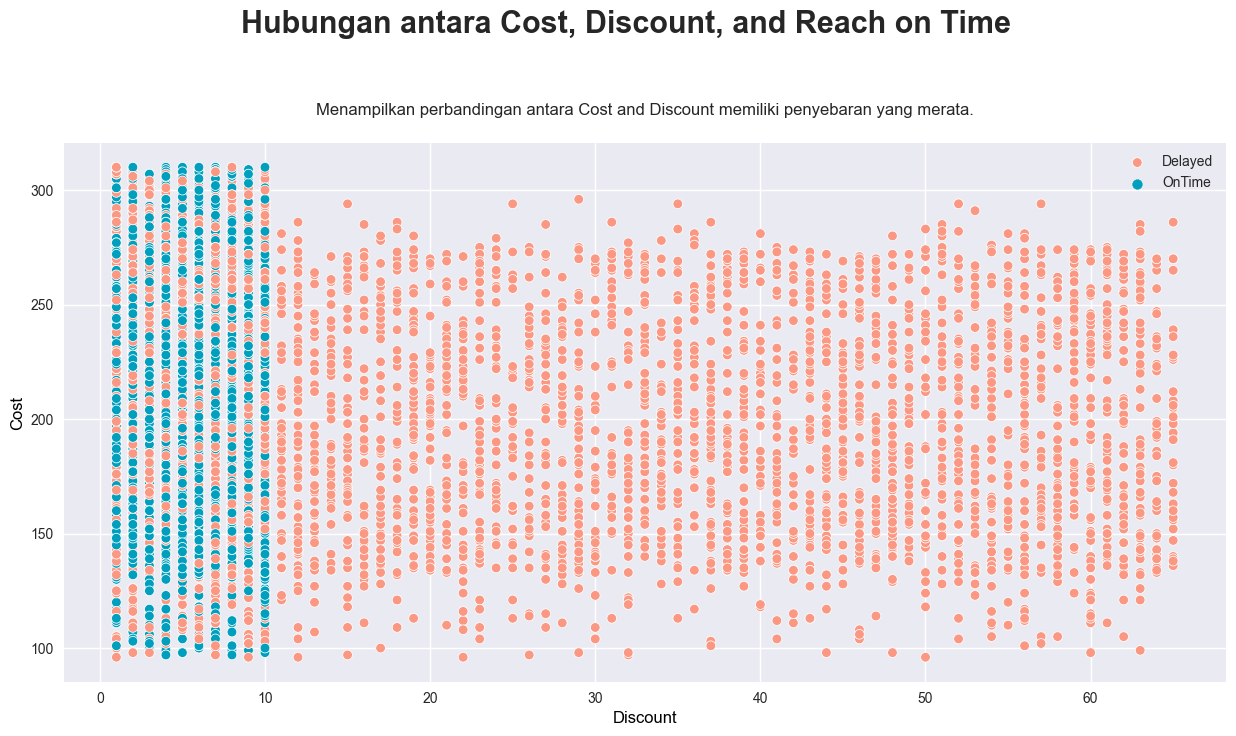

In [225]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Discount', y='Cost', data=df, hue='Late', palette=['#009FBD', '#FA9884'])
plt.suptitle('Hubungan antara Cost, Discount, and Reach on Time', fontsize=22, fontweight='bold', y=1.07)
plt.title('Menampilkan perbandingan antara Cost and Discount memiliki penyebaran yang merata.', pad=20)
plt.xlabel('Discount', font={'family': 'sans-serif', 'size': 12}, color='black')
plt.ylabel('Cost', font={'family': 'sans-serif', 'size': 12}, color='black')

plt.legend(labels=['Delayed', 'OnTime'])

plt.show()


**Insight:**

Hubungan antara diskon, harga produk, dan pengiriman tepat waktu atau terlambat dapat divisualisasikan dalam bentuk scatterplot. Observasi menunjukkan bahwa tidak ada kecenderungan tertentu dalam hubungan antara harga produk dan diskon yang ditawarkan. Namun, ketika sumber daya atau kapasitas pengiriman terbatas, perusahaan cenderung memprioritaskan pengiriman untuk produk dengan diskon rendah atau tanpa diskon. Untuk mengatasi masalah ini, perusahaan dapat mengatur ketersediaan stok dan kapasitas pengiriman agar dapat menangani volume pesanan yang lebih besar dengan cara yang lebih efektif dan efisien. Salah satu solusinya adalah dengan mengevaluasi kapasitas pengiriman yang dapat mengakomodasi permintaan produk dengan diskon pengiriman yang tinggi. Penting bagi perusahaan untuk memastikan ketersediaan infrastruktur logistik yang memadai guna menjaga pengiriman tepat waktu. Selain itu, perencanaan pengiriman yang lebih terperinci dan efektif perlu dilakukan untuk produk dengan diskon pengiriman yang tinggi. Dengan demikian, meskipun produk memiliki diskon yang tinggi, penanganan pengiriman yang tepat waktu harus tetap dijamin.

#### **Analisis Perbandingan Data Pengiriman Pada Beberapa Aspek**

Analisis dilakukan dengan melihat pola mode pengiriman pada beberapa aspek.

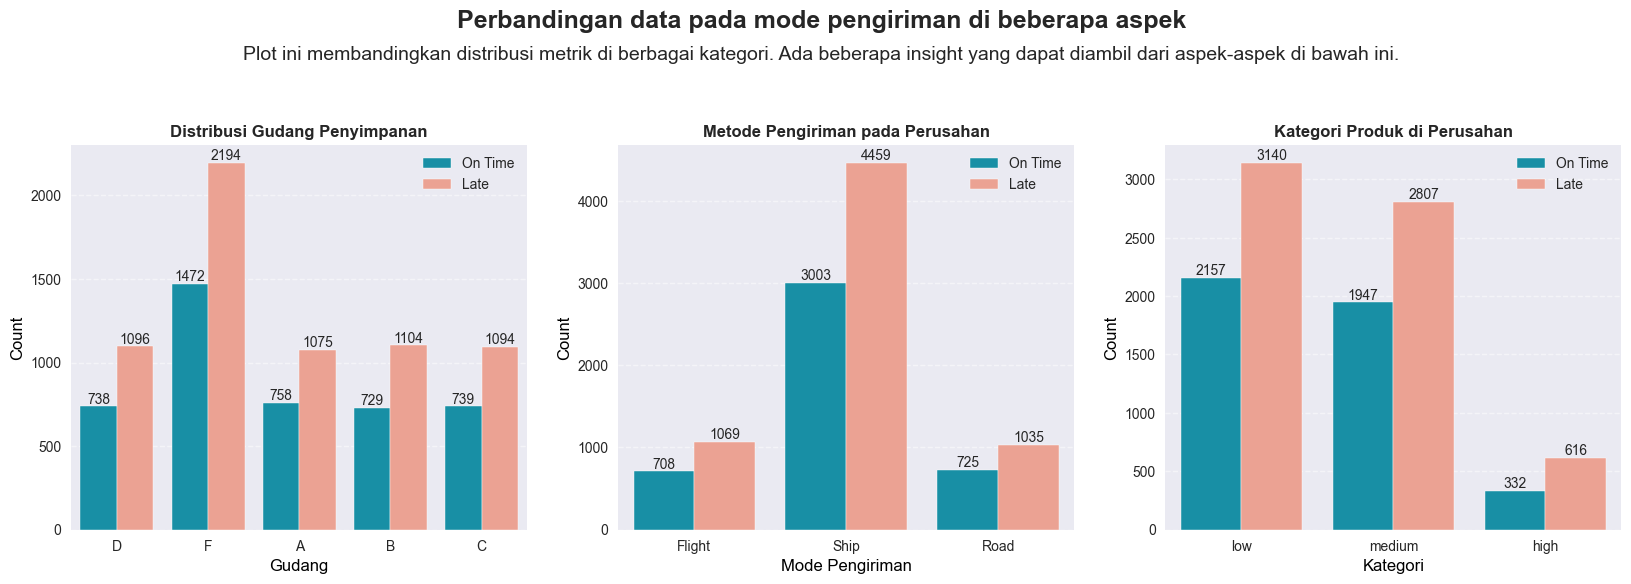

In [204]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))

sns.countplot(data=df, x='Warehouse', hue='Late', palette=['#009FBD', '#FA9884'], ax=axs[0])
axs[0].set_title('Distribusi Gudang Penyimpanan', fontweight='bold')
axs[0].set_xlabel('Gudang', font={'family': 'sans-serif', 'size': 12}, color='black')
axs[0].set_ylabel('Count', font={'family': 'sans-serif', 'size': 12}, color='black')
axs[0].legend(labels=['On Time', 'Late'])
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].grid(axis='y', linestyle='--', alpha=0.5)


for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

sns.countplot(data=df, x='Shipment', hue='Late', palette=['#009FBD', '#FA9884'], ax=axs[1])
axs[1].set_title('Metode Pengiriman pada Perusahan', fontweight='bold')
axs[1].set_xlabel('Mode Pengiriman', font={'family': 'sans-serif', 'size': 12}, color='black')
axs[1].set_ylabel('Count', font={'family': 'sans-serif', 'size': 12}, color='black')
axs[1].legend(labels=['On Time', 'Late'])
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].grid(axis='y', linestyle='--', alpha=0.5)


for p in axs[1].patches:
    axs[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

sns.countplot(data=df, x='Importance', hue='Late', palette=['#009FBD', '#FA9884'], ax=axs[2])
axs[2].set_title('Kategori Produk di Perusahan', fontweight='bold')
axs[2].set_xlabel('Kategori', font={'family': 'sans-serif', 'size': 12}, color='black')
axs[2].set_ylabel('Count', font={'family': 'sans-serif', 'size': 12}, color='black')
axs[2].legend(labels=['On Time', 'Late'])
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['left'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].grid(axis='y', linestyle='--', alpha=0.5)

for p in axs[2].patches:
    axs[2].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.suptitle('Perbandingan data pada mode pengiriman di beberapa aspek', fontsize=18, fontweight='bold', y=1.15)
fig.text(0.5, 1.05, 'Plot ini membandingkan distribusi metrik di berbagai kategori. Ada beberapa insight yang dapat diambil dari aspek-aspek di bawah ini.', ha='center', fontsize=14)

plt.show()


**Insight:**

- Distribusi Gudang Penyimpanan

Grafik countplot Distribusi Gudang Penyimpanan menunjukkan bagaimana produk terdistribusi di setiap blok gudang dan proporsi pengiriman tepat waktu atau terlambat. Dari grafik tersebut, terlihat bahwa gudang F memiliki jumlah produk paling banyak, sementara blok D memiliki jumlah produk paling sedikit dengan proporsi pengiriman tepat waktu dan terlambat. Grafik tersebut juga menunjukkan bahwa pengiriman tepat waktu dan terlambat terjadi secara merata di 4 blok gudang kecuali blok F. Namun, blok F memiliki proporsi pengiriman terlambat yang lebih tinggi dibandingkan dengan blok lainnya. Blok F merupakan pusat gudang yang sangat produktif, tetapi terdapat masalah penumpukan barang dan kecepatan penanganan yang belum sesuai dengan jumlah produk. Analisis grafik ini dapat membantu perusahaan dalam mengevaluasi dan mengoptimalkan strategi penerimaan, pemindahan, penyimpanan, pengambilan, pengemasan, dan pengiriman barang di pusat gudang. Perlu dipertimbangkan untuk meninjau lokasi gudang, kapasitas, kecepatan penanganan, dan aspek lainnya. Misalnya, perusahaan dapat memindahkan sebagian stok barang dari blok F ke blok lainnya untuk meningkatkan efisiensi penyimpanan dan pengiriman barang.

- Metode Pengiriman pada Perusahan

Grafik menunjukkan distribusi Metode Pengiriman pada Perusahan berdasarkan jumlah pengiriman menggunakan setiap metode pengiriman. Ship memiliki jumlah pengiriman terbanyak, sementara Flight dan Road memiliki nilai yang tidak jauh berbeda. Namun, pengiriman via laut memiliki persentase pengiriman yang lebih tinggi dan terlambat dibandingkan dengan pengiriman melalui Road maupun Flight. Perusahaan perlu mempertimbangkan dengan cermat armada apa yang akan dipilih. Karakteristik barang, alur pengiriman barang, kelebihan dan kekurangan masing-masing jalur darat, laut maupun udara juga dapat dijadikan acuan dalam pembuatan strategic planning pengiriman.

- Kategori Produk di Perusahan

Grafik di atas menunjukkan distribusi jumlah produk dalam tiga kategori (low, medium, high) dan proporsi pengiriman tepat waktu atau terlambat.

Mayoritas produk yang terlambat memiliki tingkat kepentingan rendah (low). Persentase keterlambatan untuk produk dengan tingkat kepentingan rendah adalah 65% dari total pengiriman produk dengan tingkat kepentingan rendah. Sementara itu, persentase keterlambatan untuk produk dengan tingkat kepentingan medium dan tinggi adalah 59% dari masing-masing total pengiriman produk dengan tingkat kepentingan medium dan tinggi.

Dari grafik ini, dapat disimpulkan bahwa produk dengan tingkat kepentingan yang lebih tinggi membutuhkan waktu pengiriman yang lebih cepat atau pengiriman express untuk memenuhi kebutuhan pelanggan. Produk dengan tingkat kepentingan yang lebih tinggi juga mungkin memerlukan metode pengemasan yang lebih aman dan hati-hati untuk memastikan keamanan pengiriman. Produk dengan tingkat kepentingan tinggi mungkin memerlukan pemantauan pengiriman yang lebih teliti, seperti pelacakan pengiriman secara real-time atau penanganan khusus selama proses pengiriman. Oleh karena itu, penanganan barang harus disesuaikan dengan tingkat kepentingan masing-masing produk.

Untuk meningkatkan pengiriman tepat waktu, perusahaan perlu melakukan perencanaan strategis yang melibatkan estimasi waktu pengiriman yang akurat untuk setiap kategori barang. Evaluasi metode pengiriman yang sesuai dengan tingkat kepentingan, peningkatan pemantauan, penyesuaian penanganan barang dengan tingkat kepentingan, serta memastikan produk dengan tingkat kepentingan tinggi dikemas dengan baik dan aman adalah langkah-langkah yang dapat diambil untuk memperbaiki layanan perusahaan. Selain itu, perusahaan juga dapat meningkatkan kerjasama dengan pemasok dan mitra logistik serta melakukan analisis kinerja secara terus-menerus untuk memastikan pengiriman yang lebih baik.

##### **Calls vs Satisfaction**
Dalam setiap panggilan customer, berdasarkan data secara garis besar berapa kali customer melakukan panggilan untuk menyelesaikan keluhan yang ia hadapi?

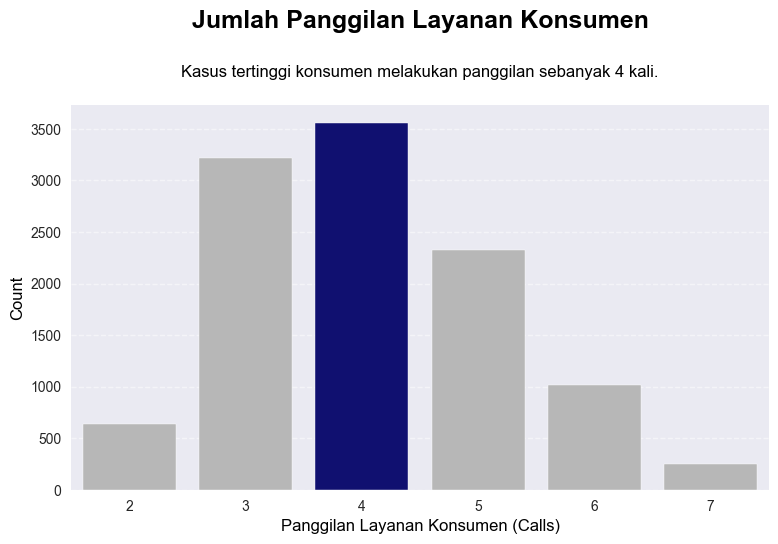

In [227]:
customer_care = df["Calls"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(x=customer_care.index, y=customer_care.values, palette=["#B7B7B7", "#B7B7B7", "navy", "#B7B7B7", "#B7B7B7", "#B7B7B7"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylabel("Count", fontweight='light', fontsize=12, color='black')
plt.xlabel("Panggilan Layanan Konsumen (Calls)", fontweight='light', fontsize=12, color='black')

plt.title("Kasus tertinggi konsumen melakukan panggilan sebanyak 4 kali.", font={'family':'sans-serif','size':12}, color='black', pad=20)
plt.text(0.5, 1.2, "Jumlah Panggilan Layanan Konsumen", transform=ax.transAxes, fontweight='bold', font={'family':'sans-serif','size':18}, color='black', ha='center')


plt.show()

**Insight:**

Grafik menunjukkan bahwa jumlah panggilan telepon kembali yang paling sering terjadi adalah 4 kali. Ini adalah area yang perlu ditingkatkan, terutama dalam hal panggilan layanan konsumen yang berkaitan dengan tingkat kepuasan konsumen. konsumen sering menghadapi masalah yang kompleks dan membutuhkan bantuan melalui panggilan layanan konsumen. Mereka melakukan panggilan ini untuk mendapatkan solusi yang cepat dan akurat. Jumlah panggilan kembali yang paling tinggi, yaitu 4 kali, menunjukkan bahwa sebagian besar masalah tidak dapat diselesaikan dalam satu kali panggilan, sehingga memiliki nilai yang buruk. Hal ini dapat disebabkan oleh kualitas layanan konsumen atau masalah yang belum terselesaikan. Dalam hal pelayanan konsumen, perusahaan dapat meningkatkan sumber daya manusia di bagian customer service. Dengan memberikan respon yang baik dan tepat, maka kepuasan konsumen akan meningkat dan bahkan dapat meningkatkan retensi konsumen.


## **`Kesimpulan dan Rekomendasi`**

Dari analisis tersebut, dapat ditarik kesimpulan sebagai berikut tentang data tersebut:

1. Penilaian KONSUMEN terhadap perusahaan menunjukkan penilaian yang kurang baik. Oleh karena itu, perusahaan perlu meningkatkan faktor-faktor yang dapat mempengaruhi penilaian yang lebih baik untuk meningkatkan kepuasan konsumen.

2. Persentase pengiriman yang terlambat jauh lebih tinggi daripada pengiriman yang tepat waktu, dengan 59,7% pengiriman terlambat dan 40,3% tepat waktu.

3. Distribusi data pengiriman memiliki pola dan tren yang berbeda dari berbagai aspek. Misalnya, gudang blok F memiliki tingkat keterlambatan pengiriman tertinggi, pengiriman melalui laut memiliki persentase keterlambatan tertinggi, dan produk dengan tingkat kepentingan rendah memiliki persentase keterlambatan tertinggi.

4. Terdapat hubungan antara biaya produk dan diskon yang memiliki distribusi yang seragam. Sedangkan hubungan antara produk yang dikirim tepat waktu cenderung memiliki diskon yang lebih kecil.

5. Perusahaan memiliki peringkat kepuasan konsumen yang buruk, dengan kasus yang paling sering terjadi adalah layanan konsumen tidak dapat menyelesaikan masalah dalam satu kali pengulangan, dan jumlah kasus tertinggi yang ditemui sebagian besar adalah empat kali panggilan telepon.

Untuk mengatasi masalah ini, perusahaan perlu meningkatkan faktor-faktor yang mempengaruhi peringkat konsumen, meningkatkan efisiensi pengiriman tepat waktu, mengoptimalkan manajemen gudang dan metode pengiriman, dan meningkatkan kualitas layanan konsumen untuk meningkatkan kepuasan konsumen.

**`Rekomendasi:`**

1. Perusahaan perlu meningkatkan penilaian pelanggan dengan meningkatkan efisiensi pengiriman, kualitas penanganan produk, dan layanan pelanggan yang lebih baik.

2. Perusahaan perlu mengevaluasi dan meningkatkan proses pengiriman mereka dengan meninjau kembali performa, kecepatan pengiriman, dan membuat rencana yang lebih efektif agar pengiriman tidak terlambat. Perusahaan juga perlu meningkatkan manajemen rantai pasokan, pengoptimalan rute pengiriman, peningkatan komunikasi antara perusahaan pengirim, dan mitra logistik.

3. Perusahaan perlu mengoptimalkan strategi penerimaan, pemindahan, penyimpanan, pengambilan, pengemasan, dan pengiriman barang di gudang pusat dan pemanfaatan merata gudang lainya. Perusahaan perlu mempertimbangkan pengaturan ulang agar dapat mengoptimalkan pengiriman barang yang tepat waktu menyesuaikan dengan produktivitas warehouse. Perusahaan perlu mempertimbangkan pengelolaan persediaan dengan metode just-in-time (JIT) untuk mengurangi persediaan yang tidak perlu. Perusahaan juga perlu meninjau ulang proses operasional gedung dengan mengidentifikasi area di mana ada kemacetan dan kebocoran waktu. Perusahaan perlu mempertimbangkan untuk memperkenalkan perubahan proses atau memanfaatkan teknologi seperti sistem manajemen rantai pasokan (supply chain management) yang terintegrasi.

4. Perusahaan perlu memberikan layanan barang tepat waktu pada beragam diskon, tidak ada kecenderungan barang tepat waktu hanya pada diskon tertentu.

5. Perusahaan perlu memperbaiki SDM Customer Care dengan pelatihan sesuai bidang, Customer Quality Assurance (CQA), pemberian penghargaan dan intensif untuk karyawan berprestasi. Perusahaan juga perlu memperbaiki aspek delivery barang.